In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [23]:
customer_df= pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [24]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

In [25]:
customer_df['Effective_To_Date'] =  pd.to_datetime(customer_df['Effective_To_Date'], infer_datetime_format=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

In [26]:
customer_df.isnull().sum()/customer_df.shape[0]

Customer                         0.0
State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location_Code                    0.0
Marital_Status                   0.0
Monthly_Premium_Auto             0.0
Months_Since_Last_Claim          0.0
Months_Since_Policy_Inception    0.0
Number_of_Open_Complaints        0.0
Number_of_Policies               0.0
Policy_Type                      0.0
Policy                           0.0
Renew_Offer_Type                 0.0
Sales_Channel                    0.0
Total_Claim_Amount               0.0
Vehicle_Class                    0.0
Vehicle_Size                     0.0
dtype: float64

In [27]:
##Numerical variables
numericals = customer_df.select_dtypes(np.number)

array([[<AxesSubplot:title={'center':'Customer_Lifetime_Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly_Premium_Auto'}>],
       [<AxesSubplot:title={'center':'Months_Since_Last_Claim'}>,
        <AxesSubplot:title={'center':'Months_Since_Policy_Inception'}>,
        <AxesSubplot:title={'center':'Number_of_Open_Complaints'}>],
       [<AxesSubplot:title={'center':'Number_of_Policies'}>,
        <AxesSubplot:title={'center':'Total_Claim_Amount'}>,
        <AxesSubplot:>]], dtype=object)

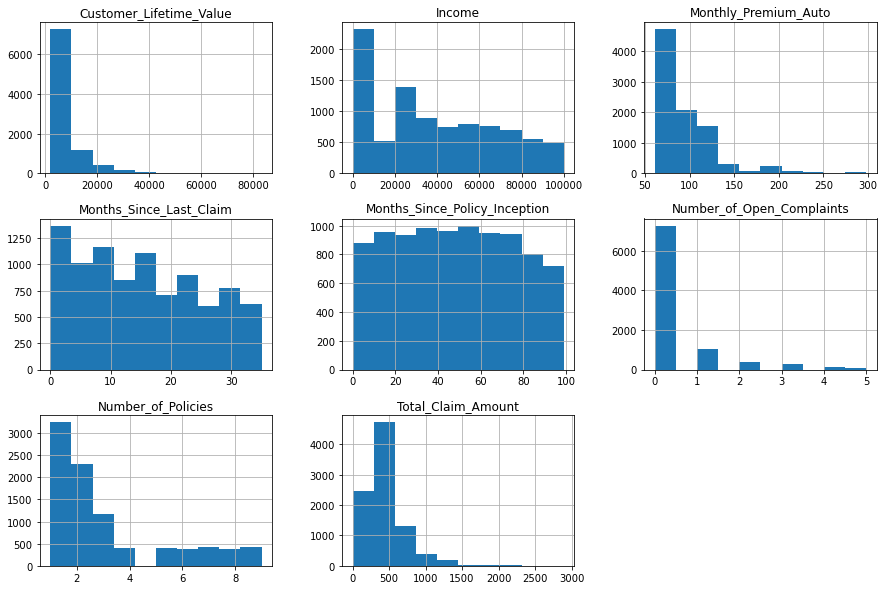

In [28]:
##Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
numericals.hist(figsize = (15, 10))

In [29]:
from sklearn.preprocessing import PowerTransformer

pT = PowerTransformer()
pT.fit(numericals)
numericals_trans = pd.DataFrame(pT.transform(numericals), columns=numericals.columns)

array([[<AxesSubplot:title={'center':'Customer_Lifetime_Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly_Premium_Auto'}>],
       [<AxesSubplot:title={'center':'Months_Since_Last_Claim'}>,
        <AxesSubplot:title={'center':'Months_Since_Policy_Inception'}>,
        <AxesSubplot:title={'center':'Number_of_Open_Complaints'}>],
       [<AxesSubplot:title={'center':'Number_of_Policies'}>,
        <AxesSubplot:title={'center':'Total_Claim_Amount'}>,
        <AxesSubplot:>]], dtype=object)

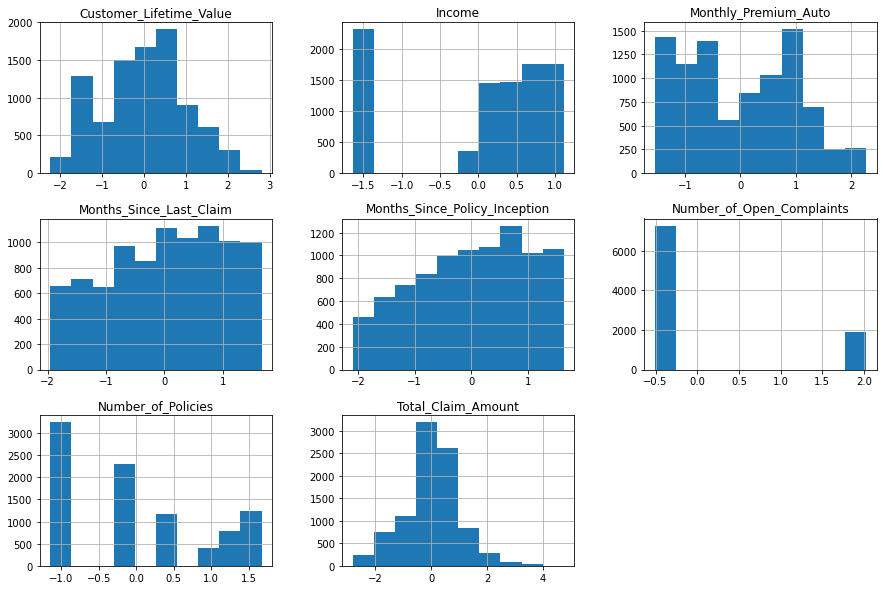

In [30]:
numericals_trans.hist(figsize = (15, 10))

### LAB COMPARING REGRESSION MODELS

In [38]:
customer_df.head(2)

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [39]:
customer_df.shape

(9134, 24)

In [ ]:
## Removing Outliers

In [40]:
def remove_outliers(data):
    data2 = data.copy()
    numeric = data2.select_dtypes(np.number)
    for col in numeric.columns:
        if col != 'Total_Claim_Amount':
            iqr = np.percentile(data2[col],75) - np.percentile(data2[col],25)
            upper_limit = np.percentile(data[col],75) + 1.5*iqr
            lower_limit = np.percentile(data[col],25) - 1.5*iqr
            data2 = data2[(data2[col] > lower_limit) & (data2[col] < upper_limit)]
        return data2

custumer_df = remove_outliers(customer_df)

In [41]:
custumer_df.shape

(8317, 24)

In [ ]:
## X/y split

In [42]:
X = customer_df.drop(['Total_Claim_Amount'], axis=1)
y = customer_df['Total_Claim_Amount']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

In [64]:
X_train_discrete = X_train.select_dtypes(np.int64)
X_train_continuous = X_train.select_dtypes([np.float64, np.datetime64])
X_train_cat = X_train.select_dtypes(object)

X_test_discrete = X_test.select_dtypes(np.int64)
X_test_continuous = X_test.select_dtypes([np.float64, np.datetime64])
X_test_cat = X_test.select_dtypes(object)

In [66]:
X_train_discrete['day']   = pd.to_datetime(X_train_continuous['Effective_To_Date']).dt.day
X_train_discrete['month'] = pd.to_datetime(X_train_continuous['Effective_To_Date']).dt.month
X_train_discrete['year']  = pd.to_datetime(X_train_continuous['Effective_To_Date']).dt.year
X_train_continuous = X_train_continuous.drop(['Effective_To_Date'], axis=1)

X_test_discrete['day']   = pd.to_datetime(X_test_continuous['Effective_To_Date']).dt.day
X_test_discrete['month'] = pd.to_datetime(X_test_continuous['Effective_To_Date']).dt.month
X_test_discrete['year']  = pd.to_datetime(X_test_continuous['Effective_To_Date']).dt.year
X_test_continuous = X_test_continuous.drop(['Effective_To_Date'], axis=1)

In [67]:
customer_df2 = customer_df

In [70]:
customer_df2.dtypes

Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                         object
Sales_Channel                           

In [76]:
from sklearn.preprocessing import PowerTransformer

pT = PowerTransformer()
pT.fit(X_train_continuous)

X_train_continuous_trans_np = pT.transform(X_train_continuous)
X_test_continuous_trans_np = pT.transform(X_test_continuous)
X_train_cat = X_train.select_dtypes(object)

X_train_continuous_trans = pd.DataFrame(X_train_continuous_trans_np, columns=X_train_continuous.columns,
                                       index=X_train_continuous.index)
X_test_continuous_trans = pd.DataFrame(X_test_continuous_trans_np, columns=X_test_continuous.columns,
                                       index=X_test_continuous.index)
X_test_cat = X_test.select_dtypes(object)

In [74]:
cat_enc= pd.get_dummies(customer_df2, columns=["State", "Response","Coverage","Education","EmploymentStatus","Gender","Location_Code","Marital_Status","Policy_Type","Renew_Offer_Type","Sales_Channel","Vehicle_Class","Vehicle_Size"])

In [78]:
def encode_categorical(data):
    data = data.drop(['Customer'], axis=1)
    return pd.get_dummies(data, drop_first=True)


X_train_cat_encoded = encode_categorical(X_train_cat)
X_test_cat_encoded = encode_categorical(X_test_cat)

In [79]:
X_train_final = pd.concat([X_train_discrete, X_train_continuous_trans, X_train_cat_encoded], axis=1)
X_test_final = pd.concat([X_test_discrete, X_test_continuous_trans, X_test_cat_encoded], axis=1)

In [80]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_final, y_train)
print(f'Train score: {lm.score(X_train_final, y_train)}')
print(f'Test score: {lm.score(X_test_final, y_test)}')

Train score: 0.7751987363344357
Test score: 0.7597210310658942


In [86]:
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train_final, y_train)

# Score
score_knn = knn_model.score(X_test_final, y_test)
score_knn

0.3733585210866731

In [87]:
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train_final, y_train)

# Score
score_knn = knn_model.score(X_train_final, y_train)
score_knn

0.6197624906245681

In [ ]:
#Seems that Linear Regression is a better model for this case